# Coupled Pendulum

For the coupled pendulum we have the following second order ODEs:
$$\begin{align*}
    mL^2\ddot{\phi_1} &= -mgL\sin\phi_1 - kl^2\cos\phi_1 (\sin\phi_1 - \sin\phi_2) \\
    mL^2\ddot{\phi_2} &= -mgL\sin\phi_2 + kl^2\cos\phi_2 (\sin\phi_1 - \sin\phi_2)
\end{align*}$$

Using the small angle approximation for $\sin\phi_n$  and $\cos\phi_n, \; n=1,2$ we get the following 

 $$\begin{align*}
    mL^2\ddot{\phi_1} &= -mgL\phi_1-kl^2(\phi_1-\phi_2)\\
    mL^2\ddot{\phi_2} &= -mgL\phi_2+kl^2(\phi_1-\phi_2)
    \end{align*}$$
    
To convert these to first order DEs, we define new variables $\theta_1, \theta_2$, which are just the time derivatives of $\phi_1$ and $\phi_2$, respectively. Therefore:
$$\begin{align*}
    \dot{\phi_1} &= \theta_1 \\
    \dot{\phi_2} &= \theta_2 \\
\end{align*}$$
This transforms our coupled ODEs into four first order ODEs:
$$\begin{align*}
    \dot{\phi_1} &= \theta_1 \\
    \dot{\phi_2} &= \theta_2  \\
    \dot{\theta_1} &= \frac{-mgL\phi_1 + kl^2(\phi_2 - \phi_1)}{mL^2} \\
    \dot{\theta_2} &= \frac{-mgL\phi_2 - kl^2(\phi_2 - \phi_1)}{mL^2}
\end{align*}$$

The constants are obtained from values either measured in the lab yourselves or universal values

$$\begin{align*}
    g \:(gravitational \: acceleration) &= 9.8 \: m.s^{-2} \\
    m \: (mass \: of \: pendulum) &= 1.0 \: kg \\
    k \: (spring \: constant) &= 3.1 \: N.m^{-1} \\
    L \: (Length \: of \: pendulum) &= \: 0.97 m
\end{align*}$$

Both pendulums are assumed to start from rest and their intial angles of displacement are defined by the list w0 in the code below and vary based on the type of motion we want to observe. During the lab the angle of displacement we used was $8^{\circ}$ or $\frac{2\pi}{45}$ radians, and we will use that as our initial angle of displacement for consistency.

To model how the $\sin\phi \approx \phi $  and $\cos\phi \approx 1$ approximations alter the solutions, we will solve the differential equations without making this approximation and then compare the results with the solution when the approximation is made. 

In [2]:
import math
# we define a function f, that returns the approximated differential equations
# y = [phi1, phi2, theta1, theta2]
# t - time
# p - array of parameters [g, m, k, L, l]
def f(y, t, p):
   
    g, m, k, L, l = p 
    
    return (
        y[2], y[3],
        (- m*g*L * y[0] + k*l**2 * (y[1]-y[0])) / (m*L**2), 
        (- m*g*L * y[1] - k*l**2 * (y[1]-y[0])) / (m*L**2)
    )

# Returns the exact differential equations
def fExact(y, t, p):
   
    g, m, k, L, l = p 

    return (
        y[2], y[3],
        (-m*g*L * math.sin(y[0]) + k*l**2 * math.cos(y[0]) * (math.sin(y[1])-math.sin(y[0]))) / (m*L**2),
        (-m*g*L * math.sin(y[1]) - k*l**2 * math.cos(y[1]) * (math.sin(y[1])-math.sin(y[0]))) / (m*L** 2)
    );


In [245]:
import matplotlib.pyplot as plot
import numpy as np
from scipy.integrate import odeint
import scipy.constants

# First we define the constants
g = 9.79
m = 1.0
k = 3.1
L = 0.97
l = 0.36

p = [g, m, k, L, l]

# sampling rate
Fs = 150.0;
# sampling interval
Ts = 1.0/Fs; 
# Create an array of time values.
t = np.arange(0,600,Ts) 

# initial conditions when the pendulum is started in-phase
w0 = [2*scipy.constants.pi/45, 2*scipy.constants.pi/45, 0, 0]
# Solve the approximated differential equations for inital values above
yInPhase = odeint(f, w0, t, args=(p,))
yInPhaseExact = odeint(fExact, w0, t, args=(p,))

# initial conditions when the pendulum is started out-of-phase
w0 = [2*scipy.constants.pi/45, -2*scipy.constants.pi/45, 0, 0]
yOutPhase = odeint(f, w0, t, args=(p,))
yOutPhaseExact = odeint(fExact, w0, t, args=(p,))

# initial conditions when the pendulum is started in beat frequency
w0 = [2*scipy.constants.pi/45, 0, 0, 0]
yBeat = odeint(f, w0, t, args=(p,))
yBeatExact = odeint(fExact, w0, t, args=(p,))


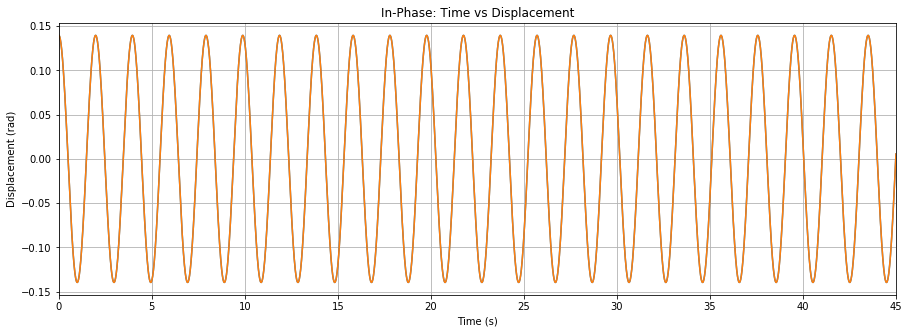

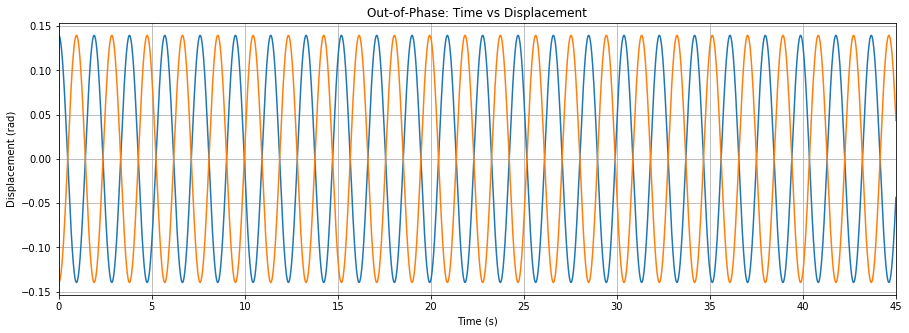

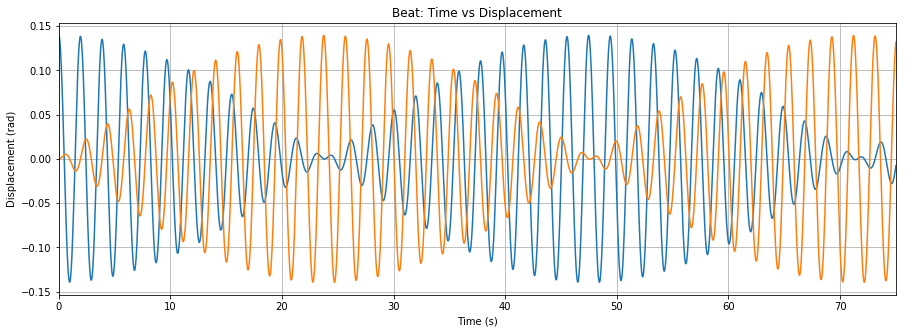

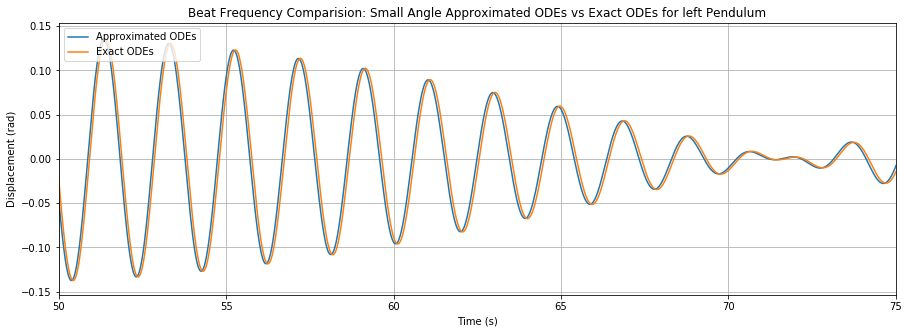

In [246]:
plot.plot(t, yInPhase[:,0])
plot.plot(t, yInPhase[:,1])
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 45))
plot.title('In-Phase: Time vs Displacement')
plot.grid()
plot.show()

plot.plot(t, yOutPhase[:,0])
plot.plot(t, yOutPhase[:,1])
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 45))
plot.title('Out-of-Phase: Time vs Displacement')
plot.grid()
plot.show()


plot.plot(t, yBeat[:,0])
plot.plot(t, yBeat[:,1])
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 75))
plot.title('Beat: Time vs Displacement')
plot.grid()
plot.show()

plot.plot(t, yBeat[:,0], label='Approximated ODEs')
plot.plot(t, yBeatExact[:,0], label='Exact ODEs')
plot.legend(loc='upper left')
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((50, 75))
plot.title('Beat Frequency Comparision: Small Angle Approximated ODEs vs Exact ODEs for left Pendulum')
plot.grid()
plot.show()


## Fourier Transform

We can then perform a fourier transform to find the frequencies of oscillations

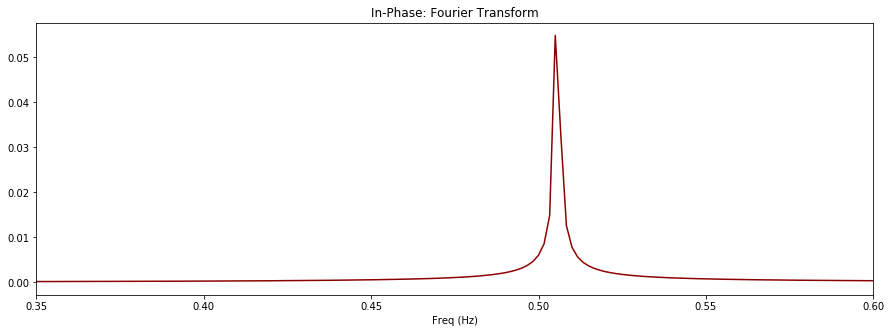

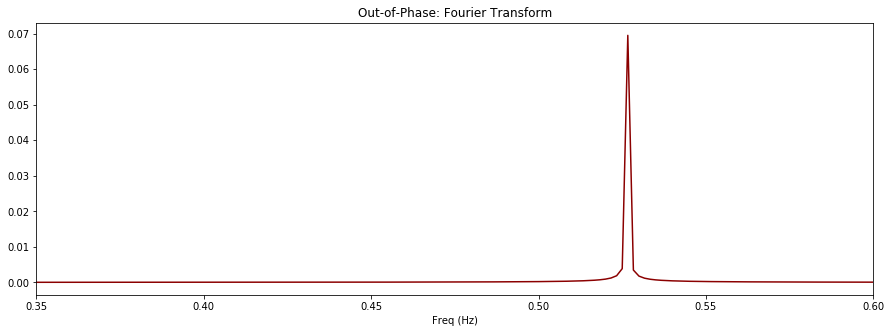

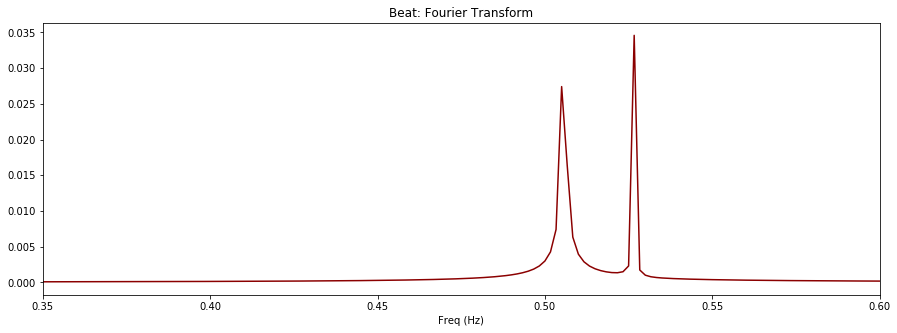

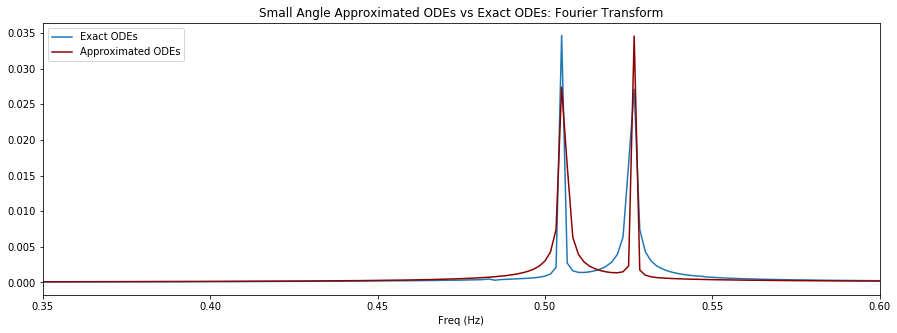

In [247]:
import scipy.fftpack

# Create the frequency domain 
n = len(yInPhase[:,0])
k = np.arange(n)
T = n/Fs
frq = k/T

# Perform the fourier transform for all three motions of the pendulum
# Small 
YInPhase = np.fft.fft(yInPhase[:,0])/n
YOutPhase = np.fft.fft(yOutPhase[:,0])/n
YBeat = np.fft.fft(yBeat[:,0])/n

# Perform the fourier transform for all three motions of the pendulum
YInPhaseExact = np.fft.fft(yInPhaseExact[:,0])/n
YOutPhaseExact = np.fft.fft(yOutPhaseExact[:,0])/n
YBeatExact = np.fft.fft(yBeatExact[:,0])/n

plot.title('In-Phase: Fourier Transform')
plot.plot(frq,abs(YInPhase), 'darkred')
plot.xlabel('Freq (Hz)')
plot.xlim((0.35, 0.6))
plot.show()

plot.title('Out-of-Phase: Fourier Transform')
plot.plot(frq,abs(YOutPhase), 'darkred')
plot.xlabel('Freq (Hz)')
plot.xlim((0.35, 0.6))
plot.show()

plot.title('Beat: Fourier Transform')
plot.plot(frq,abs(YBeat), 'darkred')
plot.xlabel('Freq (Hz)')
plot.xlim((0.35, 0.6))
plot.show()

plot.title('Small Angle Approximated ODEs vs Exact ODEs: Fourier Transform')
plot.plot(frq,abs(YBeatExact), label='Exact ODEs')
plot.plot(frq,abs(YBeat), label='Approximated ODEs', color='darkred')
plot.legend(loc='upper left')
plot.xlabel('Freq (Hz)')
plot.xlim((0.35, 0.6))
plot.show()

## Large Angles

We will now investigate how the small angle approximation effects the solution at larger angles. Using an initial angle of $\frac{\pi}{3}$ we have:

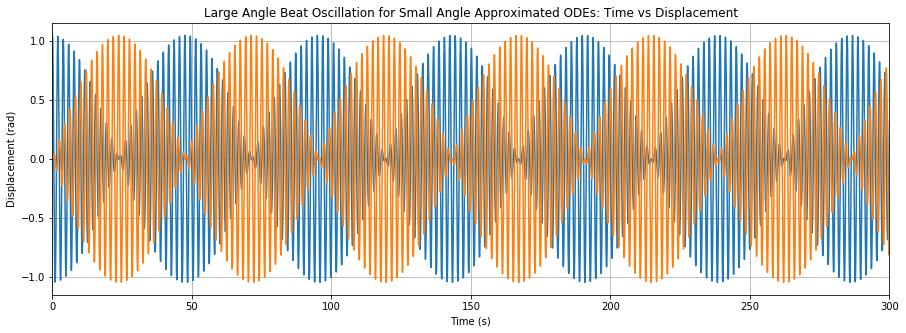

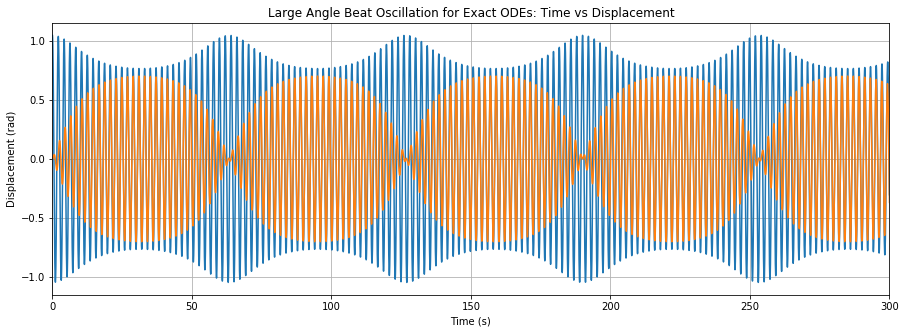

In [249]:
w0 = [scipy.constants.pi/3, 0, 0, 0]
yBeatLarge = odeint(f, w0, t, args=(p,))
yBeatExactLarge = odeint(fExact, w0, t, args=(p,))

plot.plot(t, yBeatLarge[:,0])
plot.plot(t, yBeatLarge[:,1])
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 300))
plot.title('Large Angle Beat Oscillation for Small Angle Approximated ODEs: Time vs Displacement')
plot.grid()
plot.show()


plot.plot(t, yBeatExactLarge[:,0])
plot.plot(t, yBeatExactLarge[:,1])
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 300))
plot.title('Large Angle Beat Oscillation for Exact ODEs: Time vs Displacement')
plot.grid()
plot.show()

At the angle of $\frac{\pi}{3}$ the small angle approximated ODEs claim that the pendula still oscillate in a similar manner to the coupled pendula we observed during the lab, however that is shown to be false as the oscillation of the pendula takes a completely different pattern of motion when the ODEs that do not use the small angle approximation are used to solve the initial value problem.

## Triple Coupled Pendulum

From a process that is similar to deriving the equations of the coupled pendulum we derived following second order ODEs for the triple coupled pendulum:
$$\begin{align*}
    mL^2\ddot{\phi_1} &= -mgL \sin \phi_1 + kl^2 \cos\phi_1(\sin\phi_2 - \sin\phi_1) \\
    mL^2\ddot{\phi_2} &= -mgL \sin \phi_2 - kl^2 \cos\phi_2(\sin\phi_2 - \sin\phi_1) + kl^2\cos\phi_2(\sin\phi_3 - \sin\phi_2) \\
    mL^2\ddot{\phi_3} &= -mgL \sin\phi_3 + kl^2 \cos\phi_3(\sin\phi_3 - \sin\phi_2)
\end{align*}$$

Using the small angle approximation for $\sin\phi_n$  and $\cos\phi_n, \; n=1,2, 3$ we get the following 

 $$\begin{align*}
    mL^2\ddot{\phi_1} &= -mgL \phi_1 + kl^2(\phi_2-\phi_1)\\
    mL^2\ddot{\phi_2} &= -mgL \phi_2 - kl^2(\phi_2-\phi_1) + kl^2(\phi_3-\phi_2) \\ 
    mL^2\ddot{\phi_3} &= -mgL \phi_3 + kl^2(\phi_3-\phi_2)
    \end{align*}$$
    
To convert these to first order DEs, we define new variables $\theta_1, \theta_2, \theta_3$, which are just the time derivative of $\phi_1, \phi_2$ and $\phi_2$, respectively. Therefore:
$$\begin{align*}
    \theta_1 &= \dot{\phi_1} \\
    \theta_2 &= \dot{\phi_2} \\
    \theta_3 &= \dot{\phi_3} 
\end{align*}$$
This transforms our coupled ODEs into four first order ODEs:
$$\begin{align*}
    \theta_1 &= \dot{\phi_1} \\
    \theta_2 &= \dot{\phi_2} \\
    \theta_3 &= \dot{\phi_3} \\
    \dot{\theta_1} &= \frac{-mgL\phi_1 + kl^2(\phi_2 - \phi_1)}{mL^2} \\
    \dot{\theta_2} &= \frac{-mgL\phi_2 - kl^2(\phi_2 - \phi_1) + kl^2(\phi_3 - \phi_2)}{mL^2} \\
    \dot{\theta_3} &= \frac{-mgL\phi_3 - kl^2(\phi_3 - \phi_2)}{mL^2}
\end{align*}$$

The out-of-phase and beat oscillations that we observed in the two coupled pendula do not have an analogous pattern of oscillation for the triple pendulum so we will just observe how adding a third coupled pendulum, with an initial angle of displacement of 0, changes the pattern of oscillation for the out-of-phase and beat initial conditions we used for the coupled pendulum.

In [64]:
# we define a function f, that returns the approximated differential equations
# y = [phi1, phi2, theta1, theta2]
# t - time
# p - array of parameters [g, m, k, L, l]
def ff(y, t, p):
   
    g, m, k, L, l = p 
    
    return (
        y[3], y[4], y[5],
        (-m*g*L * y[0] + k*l**2 * (y[1]-y[0])) / (m*L**2), 
        (-m*g*L * y[1] - k*l**2 * (y[1]-y[0]) + k*l**2 * (y[2]-y[1])) / (m*L**2),
        (-m*g*L * y[2] + k*l**2 * (y[2]-y[1])) / (m*L**2)
    )


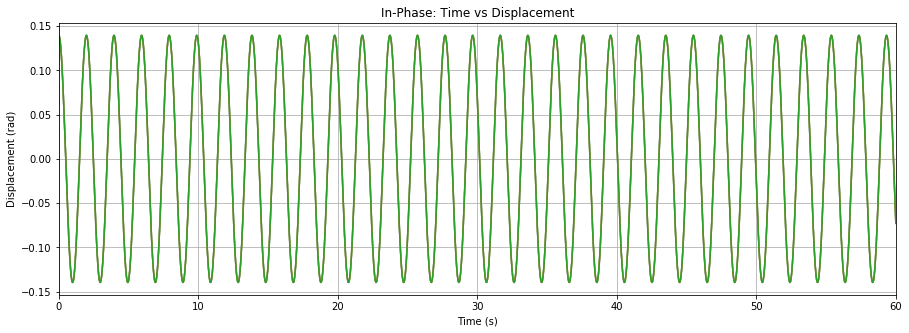

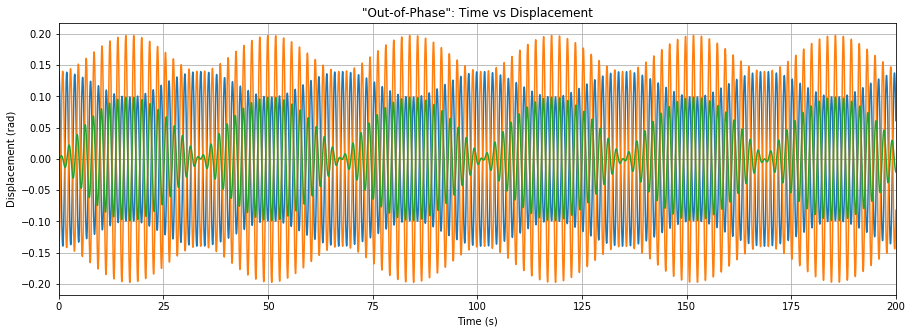

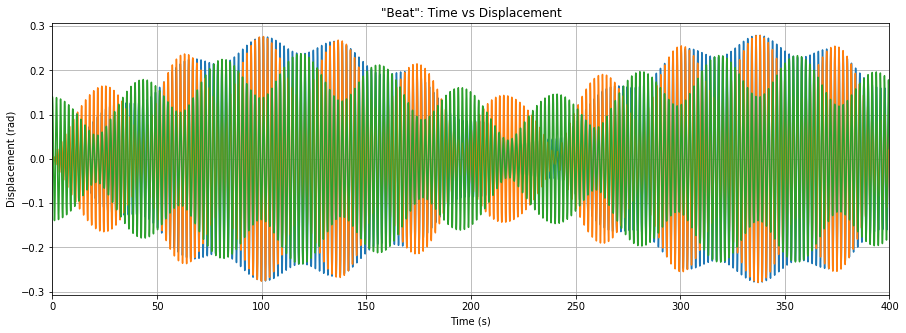

In [213]:
import matplotlib.pyplot as plot
import numpy as np
from scipy.integrate import odeint
import scipy.constants
plot.rcParams["figure.figsize"] = (15, 5)

# First we define the constants
g = 9.79
m = 1.0
k = 3.1
L = 0.97
l = 0.36

p = [g, m, k, L, l]

# sampling rate
Fs = 150.0;
# sampling interval
Ts = 1.0/Fs; 
# Create an array of time values.
t = np.arange(0,600,Ts) 

# initial conditions when the pendulum is started in-phase    
w0 = [2*scipy.constants.pi/45, 2*scipy.constants.pi/45, 2*scipy.constants.pi/45, 0, 0, 0]
yInPhase = odeint(ff, w0, t, args=(p,))

# initial conditions when the pendulum is started out-of-phase
w0 = [2*scipy.constants.pi/45, -2*scipy.constants.pi/45, 0, 0, 0, 0]
yOutPhase = odeint(ff, w0, t, args=(p,))

# initial conditions when the pendulum is started in beat frequency
w0 = [2*scipy.constants.pi/45, 0, 0, 0, 0, 0]
yBeat = odeint(ff, w0, t, args=(p,))

plot.plot(t, yInPhase[:,0])
plot.plot(t, yInPhase[:,1])
plot.plot(t, yInPhase[:,2])
plot.title('In-Phase: Time vs Displacement')
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 60))
plot.grid()
plot.show()

plot.plot(t, yOutPhase[:,0])
plot.plot(t, yOutPhase[:,1])
plot.plot(t, yOutPhase[:,2])
plot.title('\"Out-of-Phase\": Time vs Displacement')
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 200))
plot.grid()
plot.show()


plot.plot(t, yBeat[:,2])
plot.plot(t, yBeat[:,1])
plot.plot(t, yBeat[:,0])
plot.title('\"Beat\": Time vs Displacement')
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 400))
plot.grid()
plot.show()

As we expected from the equations of motion there is no coupling between the three pendula when they are started in-phase, and thus all three pendula oscillate at the same frequency. We can observe in the next two graphs how adding the thrid coupled pendulum has altered the out-of-phase and beat motion of the pendula we observed earlier.